In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

In [2]:
fifa_data = pd.read_csv("E:/Matplotlib/fifa_data.csv")
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
nan_df = fifa_data[fifa_data.isna().any(axis=1)]
# there are no null values

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# How players have age grater than 30 ?

In [3]:

age_30= fifa_data[(fifa_data['Age']>30)]
len(age_30)


2582

# How many players of Portugal are there in this Dataset?

In [5]:

len(fifa_data[fifa_data['Nationality']=="Portugal"])

322

# Which Player has the most overall rating? Find his name club and nationality

In [7]:
df1 = fifa_data[["Overall","Name","Club","Nationality"]]
best_rating = df1['Overall'].max() 

top_player= fifa_data[fifa_data['Overall']==best_rating]

top_player_info= top_player[["Name","Club","Nationality"]]
print(top_player_info)


                Name          Club Nationality
0           L. Messi  FC Barcelona   Argentina
1  Cristiano Ronaldo      Juventus    Portugal


# How many players are there who prefer left foot?

In [7]:
fifa_data[fifa_data["Preferred Foot"]=='Left'].shape[0]
# print(fifa_data.loc[fifa_data["Preferred Foot"]=='Left'].count().iloc[0])

4211

# Which country posses the highest number of players?

In [9]:

# max(fifa_data.groupby("Nationality")['ID'].count())
fifa_data['Nationality'].value_counts().head(1)# value_count nationality+ koita player ase eksathe dekhay in ascending order


Nationality
England    1662
Name: count, dtype: int64

# Which club has the highest overall rating of all?

In [8]:


club_mean = fifa_data.groupby("Club")[['Overall']].mean()

max_mean = club_mean['Overall'].max()   
top_club = club_mean['Overall'].idxmax()  

print(f"Highest mean overall: {max_mean} by {top_club}")



Highest mean overall: 82.28 by Juventus


In [73]:
# Nationality wise, find avegrage age

fifa_data.groupby('Nationality', sort= False)[['Age']].mean()


,Age
Nationality,
Argentina,26.205977
Portugal,25.760870
Brazil,27.625151
Spain,25.325560
Belgium,24.334615
...,...
Malta,25.000000
Belize,25.000000
South Sudan,25.000000


# Position wise find average wage (salary) 

In [131]:
import re

fifa_data["Wage"]=fifa_data["Wage"].str[1:]
fifa_data["Wage"]=fifa_data["Wage"].str.replace('K','',regex=False)
a=pd.to_numeric(fifa_data["Wage"])



In [132]:
fifa_data["Numeric_wage"]= a

In [133]:

fifa_data.groupby("Position")[['Numeric_wage']].mean()

,Numeric_wage
Position,
CAM,10.229645
CB,7.704724
CDM,9.315401
CF,10.216216
CM,8.340746
GK,6.803951
LAM,26.142857
LB,8.726929
LCB,11.498457


# Top 10 players who has the highest Potential rating 


In [117]:
top_10= fifa_data.sort_values("Potential",ascending= False).head(10)
top_10[['Name','Potential']]

,Name,Potential
25,K. Mbappé,95
15,P. Dybala,94
0,L. Messi,94
1,Cristiano Ronaldo,94
229,G. Donnarumma,93
3,De Gea,93
9,J. Oblak,93
2,Neymar Jr,93
77,M. Škriniar,92
1143,Vinícius Júnior,92


# Which Club has players with most market values?


In [134]:
fifa_data['Value']=fifa_data["Value"].str[:-1]
fifa_data['Value']=fifa_data["Value"].str[1:]


In [142]:
fifa_data['Market_value']=pd.to_numeric(fifa_data["Value"])

In [161]:
# highest_mk_val= fifa_data.sort_values("Market value",ascending= False).head(1)
# highest_mk_val[["Club","Market value"]]

club_val=fifa_data.groupby("Club")[["Market_value"]].sum()

richest_club= club_val.sort_values("Market_value",ascending=False).head(1)

print(richest_club)


        Market_value
Club                
Padova       15621.2


# Show the age distribution of players by Histogram 

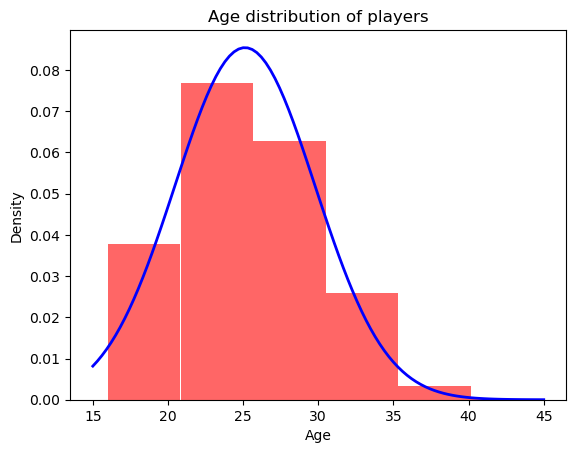

In [172]:

plt.hist(fifa_data["Age"],bins=6,density=True,alpha=0.6,color="red")
mu=np.mean(fifa_data['Age'])
sigma=np.std(fifa_data['Age'])
x=np.linspace(15,45,100)
pdf=stats.norm.pdf(x,mu,sigma)
plt.plot(x,pdf,color='blue',linewidth=2)
plt.title("Age distribution of players")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


# Top 5 countries by number of players

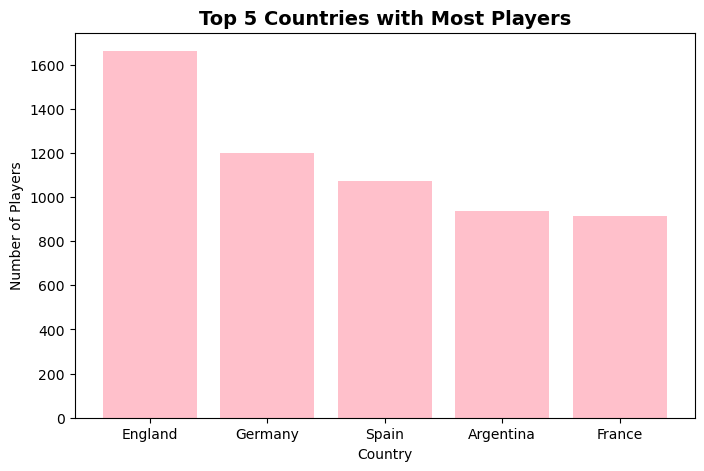

In [8]:

top_countries = fifa_data['Nationality'].value_counts().head(5)

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(top_countries.index, top_countries.values, color='pink')

plt.title("Top 5 Countries with Most Players", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.show()

# Scatter plot: Overall vs Potential 

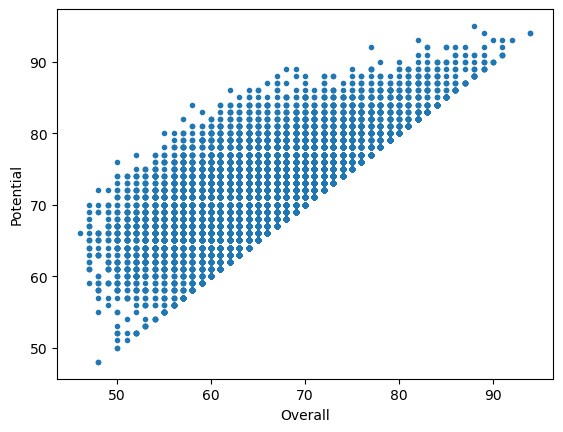

In [5]:
x= fifa_data['Overall']
y=fifa_data["Potential"]
plt.scatter(x,y,marker='.')

plt.xlabel("Overall")
plt.ylabel("Potential")
plt.show()


In [6]:
correlation= np.corrcoef(x,y)
print(correlation[0,1])

0.6609385409937798


In [10]:
fifa_data[['Name','Potential' ]]

,Name,Potential
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,93
3,De Gea,93
4,K. De Bruyne,92
...,...,...
18202,J. Lundstram,65
18203,N. Christoffersson,63
18204,B. Worman,67
18205,D. Walker-Rice,66
